# Chapter 8. Object References, Mutability, and Recycling

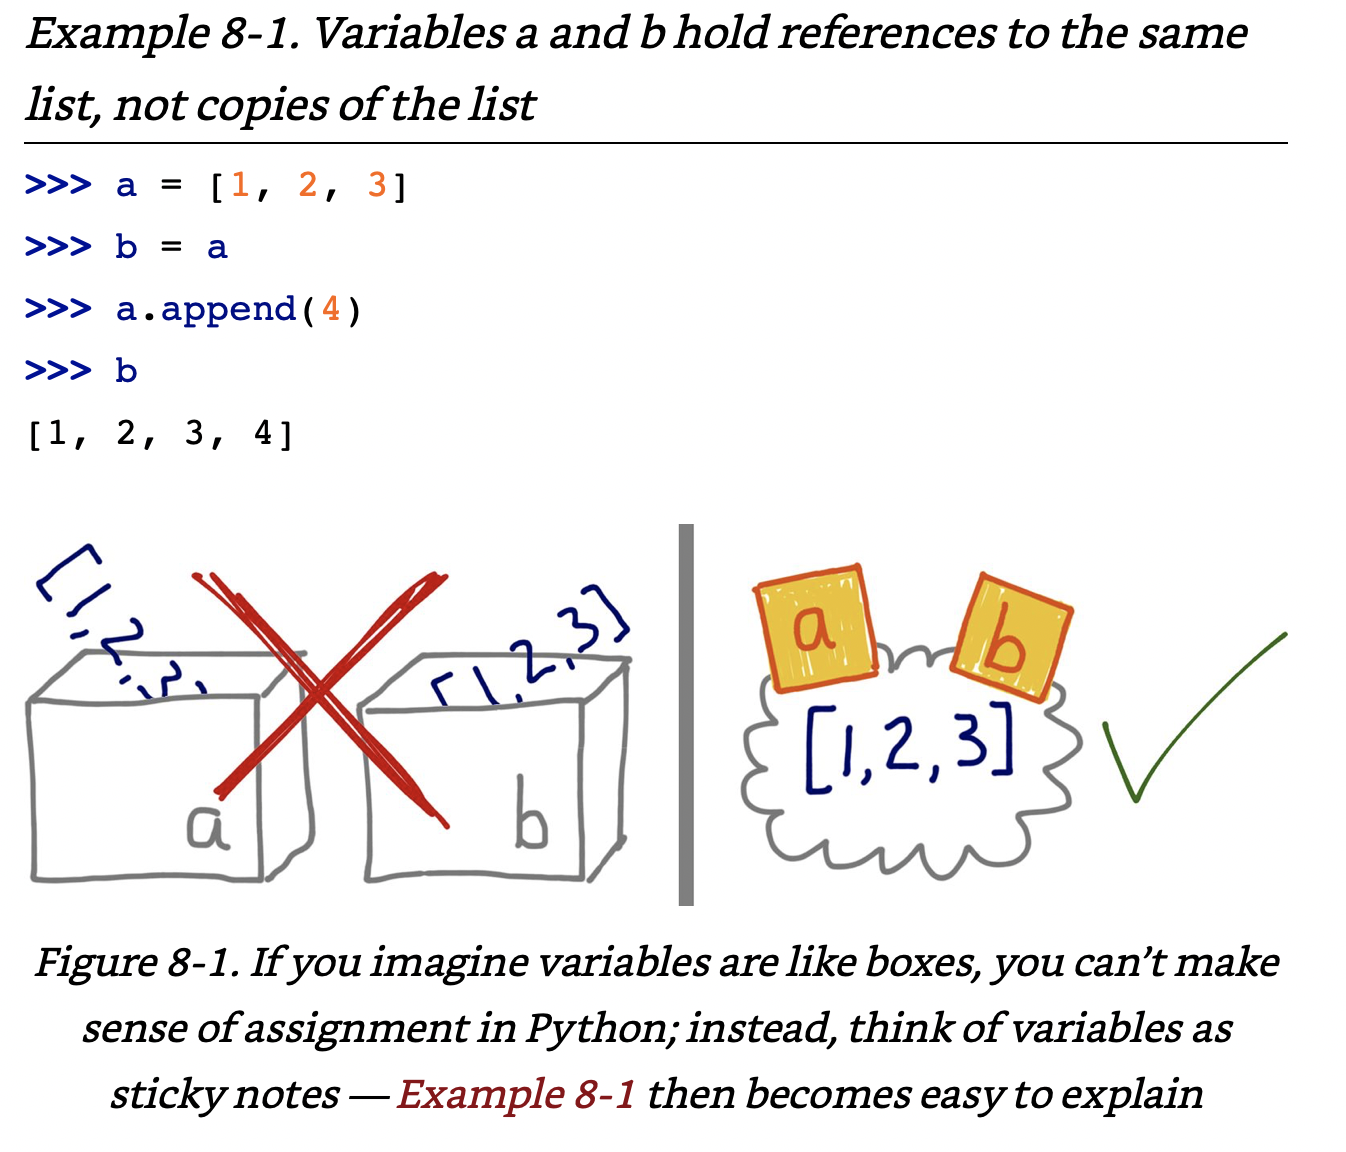

In [11]:
from IPython.display import Image
Image(filename='8image.png')

**Example 8-2.** Variables are assigned to objects only after the objects are coreated 

In [12]:
class Gizmo:
    def __init__(self):
        print('Gizmo id: %d' % id(self))

In [13]:
x = Gizmo()

Gizmo id: 140637305158672


In [14]:
y = Gizmo() *10

Gizmo id: 140637305156752


TypeError: unsupported operand type(s) for *: 'Gizmo' and 'int'

In [15]:
dir()

['Bus',
 'Gizmo',
 'Image',
 'In',
 'Out',
 '_',
 '_11',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'bus1',
 'copy',
 'exit',
 'get_ipython',
 'quit',
 'x']

## Identity, Equality, and Aliases 

**Example 8-3.** charles and lewis refer to the same object 

In [16]:
charles = {'name':'Charles L. Dodgson', 'born':1832}

In [17]:
lewis = charles

In [18]:
lewis is charles

True

In [19]:
id(charles), id(lewis)

(140637304333632, 140637304333632)

In [20]:
lewis['balance'] = 950

In [21]:
charles

{'name': 'Charles L. Dodgson', 'born': 1832, 'balance': 950}

**Example 8-4.** alex and charles compare equal, but alex is not charles 

* Example 8-3 is an example of *aliasing*. In that code, lewis and charles are aliases: two variables bound to the same object. 
* On the other hand, alex is not an alias for charles: these variables are bound to distinct objects. The objects bound to alex and charles have the same value - that what == compares - but they have different identities. 

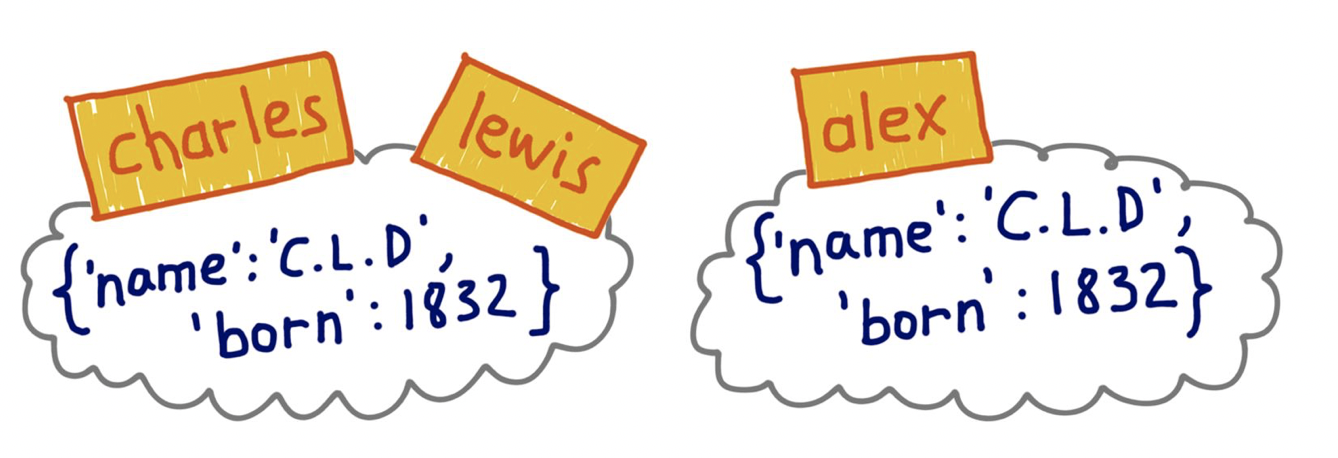

In [22]:
Image(filename='8image2.png')

In [23]:
alex = {'name':'Charles L. Dodgson','born':1832, 'balance':950}

In [24]:
# The objects compare equal, because the __eq__ implementation in the dict class. 
alex == charles

True

In [25]:
# But they are distinct objects. 
# This is the Pythonic way of writing the negative identity comparision: a is not b
alex is not charles

True

**From *The Python Language Reference***:

* Every object has an identity, a type and a value. An object's identity never changes once it has been created; you may think of it as the object's address in memeory. The **is** operator compares the identity of two objects; the **id()** function returns an integer representing its identity.

* The **==** operator compares the values of objects (the data they hold), while **is** compares their identities. 
    
   

**Example 8-5.** t1 and t2 initially compare equal, but changing a mutable item inside tuple t1 makes it different. 

In [26]:
t1 = (1,2,[30,40])

In [27]:
t2 = (1,2,[30,40])

In [28]:
t1 == t2

True

In [29]:
id(t1[-1])

140637306421504

In [30]:
t1[-1].append(99)

In [31]:
id(t1[-1])

140637306421504

In [32]:
t1 == t2

False

In [33]:
t2

(1, 2, [30, 40])

In [34]:
t1

(1, 2, [30, 40, 99])

## Copies are shallow by Default

**Example 8-6.** Making a shallow copy of a list containing another list; copy and paste this code to see it animated at the online pytnon tutor

In [35]:
list1=[3,[66,55,44],(7,8,9)]

In [36]:
list2 = list(list1)

In [37]:
list1.append(100)

In [38]:
list1[1].remove(55)

In [39]:
print('list 1: ', list1)

list 1:  [3, [66, 44], (7, 8, 9), 100]


In [40]:
print('list 2: ',list2)

list 2:  [3, [66, 44], (7, 8, 9)]


In [41]:
list2[1] += [33,22]
list2[2] += (10,11)

In [42]:
print('list 1: ',list1)

list 1:  [3, [66, 44, 33, 22], (7, 8, 9), 100]


In [43]:
print('list 2: ',list2)

list 2:  [3, [66, 44, 33, 22], (7, 8, 9, 10, 11)]


**Example 8-8.** Bus picks up and drops off passengers. 

In [44]:
class Bus:
    
    def __init__(self, passengers=None):
        
        if passengers is None:
            self.passengers = []
        else:
            self.passengers = list(passengers)
    
    def pick(self,name):
        
        self.passengers.append(name)
    
    def drop(self,name):
        self.passengers.remove(name)

**Example 8-9.** Effects of using copy vs. deepcopy

In [45]:
import copy

In [46]:
bus1 = Bus(['Alice','Bill','Claire','David'])

In [47]:
bus2 = copy.copy(bus1)

In [48]:
bus3 = copy.deepcopy(bus1)

In [49]:
id(bus1), id(bus2), id(bus3)

(140637306481152, 140637306481632, 140637306480960)

In [50]:
bus1.drop('Bill')

In [51]:
bus2.passengers

['Alice', 'Claire', 'David']

In [53]:
id(bus1.passengers), id(bus2.passengers), id(bus3.passengers)

(140637306523008, 140637306523008, 140637304146368)

In [54]:
# bus3 is a deep copy of bus1, so its passengers attribute refers to another list
bus3.passengers

['Alice', 'Bill', 'Claire', 'David']

**Example 8-10.** Cyclic references: *b* refers to *a*, and then is appended to *a*; deepcopy still manages to copy *a*

In [55]:
a = [10,20]

In [56]:
b = [a,30]

In [57]:
a.append(b)

In [58]:
a

[10, 20, [[...], 30]]

In [59]:
from copy import deepcopy

In [61]:
c = deepcopy(a)

In [62]:
c

[10, 20, [[...], 30]]

## Function Parameters as References

**Example 8-11.** A function may change any mutable object it receives

In [63]:
def f(a,b):
    a += b
    return a 

In [64]:
x = 1 
y = 2

In [65]:
f(x,y)

3

In [66]:
a=[1,2]
b=[3,4]

In [67]:
f(a,b)

[1, 2, 3, 4]

In [68]:
a,b

([1, 2, 3, 4], [3, 4])

In [69]:
t = (10,20)
u = (30,40)

In [70]:
f(t,u)

(10, 20, 30, 40)

In [71]:
t,u

((10, 20), (30, 40))

### Mutable Types as Parameter Defaults: Bad Idea!!!!!

**Example 8-12.** A simple class to illustrate the danger of a mutable default

In [73]:
class HauntedBus:
    
    """A bus model haunted by ghost passengers"""
    
    def __init__(self, passengers=[]):
        self.passengers = passengers
    
    def pick(self,name):
        self.passengers.append(name)
    
    def drop(self,name):
        self.passengers.remove(name)

In [74]:
bus1 = HauntedBus(['Alice','Bill'])

In [75]:
bus1.passengers

['Alice', 'Bill']

In [76]:
bus1.pick('Charlie')

In [77]:
bus1.drop('Alice')

In [78]:
bus1.passengers

['Bill', 'Charlie']

In [79]:
bus2 = HauntedBus()

In [80]:
bus2.pick('Carrie')

In [81]:
bus2.passengers

['Carrie']

In [82]:
bus3 = HauntedBus()

In [83]:
bus3.passengers

['Carrie']

In [84]:
bus3.pick('Dave')

In [85]:
bus2.passengers

['Carrie', 'Dave']

In [86]:
bus2.passengers is bus3.passengers # Problem!! bus2.passengers and bus3.passengers refer to the same list

True

In [87]:
bus1.passengers # but bus1.passengers is a distinct list

['Bill', 'Charlie']

**Example 8-15.** Explanation of the problem. A simple class to show the perils of mutating received arguments 

In [89]:
class TwilightBus:
    
    """A bus model that makes passengers vanish"""
    
    def __init__(self, passengers=None):
        
        if passengers is None:
            self.passengers = [] #we are careful to create a new empy list when passengers is None

        else:
            self.passengers = passengers # HOWEVER, this assignment makes self.passengers
            # an alias for passengers, which is itself an alias for the actual argument passed 
            # to __init__
            ####it should be changed to self.passengers = list(passengers)
    
    def pick(self,name):
        self.passengers.append(name)
        
    def drop(self,name):
        self.passengers.remove(name)# When the methods.remove() and .append()
        # are used with self.passengers, we are actually mutating the original list received
        # as argument to the constructor. 
            

## del and Garbage Collection 

**Example 8-16.** Watching the end of an object when no more references point to it. 

In [90]:
import weakref

In [91]:
s1 = {1,2,3}

In [92]:
s2 = s1

In [93]:
def bye():
    print('Gone with the wind...')

In [94]:
ender = weakref.finalize(s1,bye)

In [95]:
ender.alive

True

In [96]:
del s1

In [97]:
ender.alive

True

In [98]:
s2 = 'spam'

In [99]:
ender.alive

True

## Weak Reference:

* The presence of references is what keeps an object alive in memory. When the reference count of an object reaches zero, the garbage collector disposes of it.
* A weak reference doesn't prevent the referent from being garbage collected. (The object that is the target of a reference is called the *referent*.

**Example 8-17.** A weak reference is a callable that returns the referenced object or None if the referent is no more.

* example shows how a weakref.ref instance can be called to reach its referent. It the object is alive, calling the weak reference returns it, otherwise None is returned. 

In [100]:
import weakref

In [101]:
a_set = {0,1}

In [102]:
wref = weakref.ref(a_set)# The wref week reference object is created and inspected 
wref

<weakref at 0x7fe8ada72ef0; to 'set' at 0x7fe8addf03c0>

In [103]:
wref()# Invoking wref() returns the referenced object {0,1}

{0, 1}

In [104]:
a_set = {2,3,4}# a_set no longer refers to {0,1} set, so its reference count is decreased. 

In [105]:
wref()#Calling wref() still returns {0,1}

{0, 1}

In [106]:
wref() is None

False

**Example 8-18.** Cheese has a kind attribute and a standard representation
* this iexample implements a trivial class to represent each kind of cheese.

In [108]:
class Cheese:
    
    def __init__(self,kind):
        self.kind = kind
    
    def __repr__(self):
        return 'Cheese(%r)' %self.kind

**Example 8-19.** In this example, each cheese is loaded from a catalog to a stock implemented as a WeakValdueDictionary. 

In [109]:
import weakref

In [110]:
stock = weakref.WeakValueDictionary() #stock is a WeakValueDicionary

In [111]:
catalog = [Cheese('Red Leicester'), 
           Cheese('Tilsit'),
          Cheese('Brie'),
          Cheese('Parmesan')]

In [112]:
for cheese in catalog:
    stock[cheese.kind] = cheese #the stock maps the name of the cheese to a week
    # reference to the cheese instance in the catalog.

In [113]:
sorted(stock.keys())

['Brie', 'Parmesan', 'Red Leicester', 'Tilsit']

In [114]:
del catalog

In [115]:
sorted(stock.keys())

['Parmesan']

In [116]:
del cheese

In [117]:
sorted(stock.keys())

[]

**[A WeakKeyDictionary]** can be used to assoiate additional data with an object owned by other parts of an application without adding attributes to those objects. This can be especially useful with objects that override attribute accesses.